# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']-273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mossel bay
Processing Record 2 of Set 1 | tutoia
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | iskateley
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | antsiranana
Processing Record 9 of Set 1 | saposoa
Processing Record 10 of Set 1 | ta`u
Processing Record 11 of Set 1 | smithers
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | lihue
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | agustin codazzi
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mossel bay,-34.1831,22.1460,21.96,76,12,4.28,ZA,1733899430
1,tutoia,-2.7619,-42.2744,26.11,81,100,5.96,BR,1733899432
2,bethel,41.3712,-73.4140,7.74,89,100,1.54,US,1733899433
3,iskateley,67.6803,53.1512,-6.40,94,100,5.06,RU,1733899434
4,adamstown,-25.0660,-130.1015,23.03,81,36,7.55,PN,1733899435


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mossel bay,-34.1831,22.1460,21.96,76,12,4.28,ZA,1733899430
1,tutoia,-2.7619,-42.2744,26.11,81,100,5.96,BR,1733899432
2,bethel,41.3712,-73.4140,7.74,89,100,1.54,US,1733899433
3,iskateley,67.6803,53.1512,-6.40,94,100,5.06,RU,1733899434
4,adamstown,-25.0660,-130.1015,23.03,81,36,7.55,PN,1733899435


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [12]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x,y,x_lab,y_lab):
    x_values = np.array(x)
    y_values = np.array(y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (0.05, 0.95), xycoords='axes fraction', fontsize=15, color="red")
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(f"{x_lab} vs {y_lab}")
    print(f'The r^2-value is : {rvalue**2}')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df =city_data_df.loc[city_data_df['Lat']>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bethel,41.3712,-73.4140,7.74,89,100,1.54,US,1733899433
3,iskateley,67.6803,53.1512,-6.40,94,100,5.06,RU,1733899434
10,smithers,54.7804,-127.1743,-0.82,93,100,1.54,CA,1733899441
17,lihue,21.9789,-159.3672,23.77,88,40,7.72,US,1733899450
19,agustin codazzi,10.0341,-73.2361,23.12,50,31,2.01,CO,1733899452


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =city_data_df.loc[city_data_df['Lat']<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mossel bay,-34.1831,22.1460,21.96,76,12,4.28,ZA,1733899430
1,tutoia,-2.7619,-42.2744,26.11,81,100,5.96,BR,1733899432
4,adamstown,-25.0660,-130.1015,23.03,81,36,7.55,PN,1733899435
5,blackmans bay,-43.0167,147.3167,18.07,74,100,6.39,AU,1733899436
6,edinburgh of the seven seas,-37.0676,-12.3116,14.25,78,100,8.22,SH,1733899437


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is : 0.7508856193958721


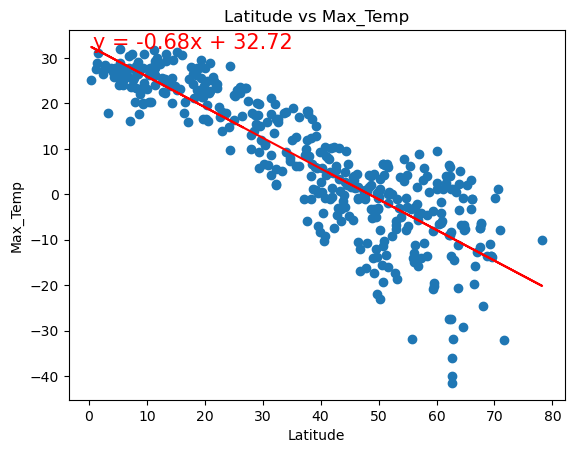

In [15]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], 'Latitude','Max_Temp')

The r^2-value is : 0.36707539799250427


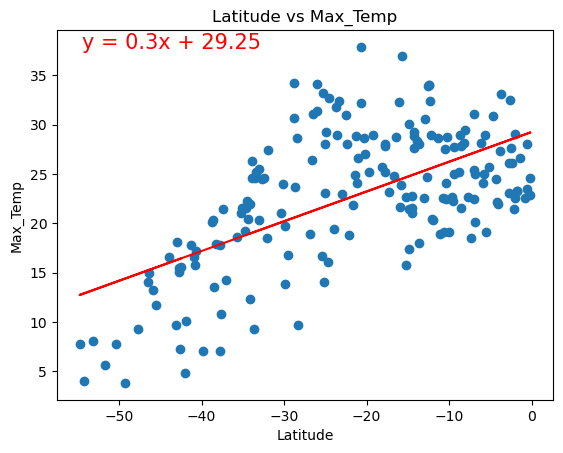

In [16]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Latitude','Max_Temp')

**Discussion about the linear relationship:** The slope is positive in southern and but negative in northern hemisphere meaning as the latitude increases the max temperature increases in southern hemisphere but decreases in northern hemisphere. For each unit increase in latitude there is 0.68 decrease in temperature where as 0.3  increase in temperature in northern and southern hemisphere respectively.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is : 0.14845353429004624


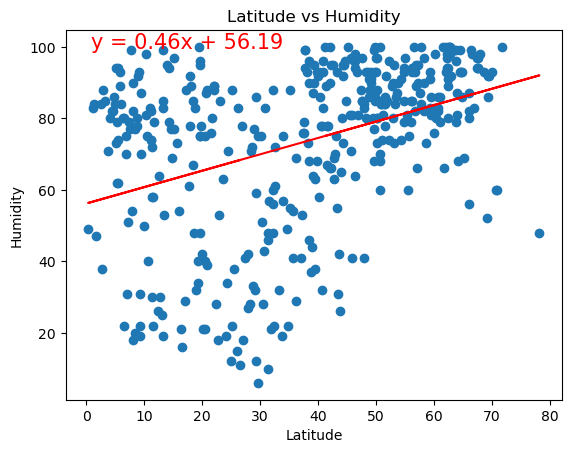

In [17]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Latitude','Humidity')

The r^2-value is : 0.02310584683921636


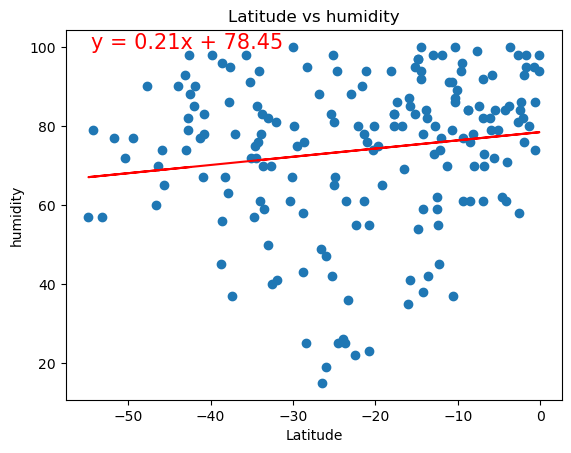

In [18]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Latitude','humidity')

**Discussion about the linear relationship:** The slope is positive in both southern and northern hemisphere meaning as the latitude increases the humidity also increases. For each unit increase in latitude there is 0.46 and 0.21 increase in humidity in northern and southern hemisphere respectively.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is : 0.07805771529498488


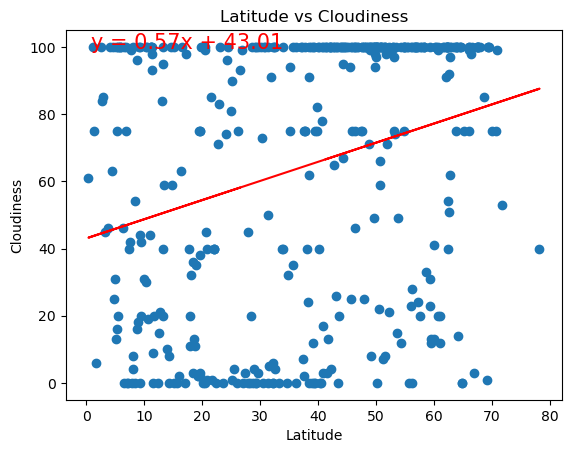

In [19]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Latitude','Cloudiness')

The r^2-value is : 0.042239595479855924


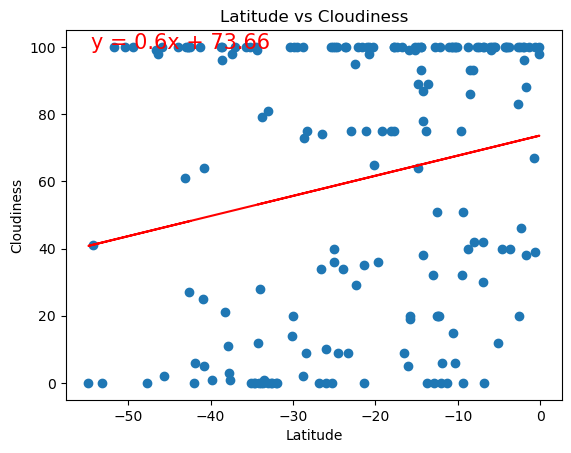

In [20]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Latitude','Cloudiness')

**Discussion about the linear relationship:** The slope is positive in both southern and northern hemisphere meaning as the latitude increases the cloudiness also increases. For each unit increase in latitude there is 0.57 and 0.6 increase in cloudiness in northern and southern hemisphere respectively.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is : 0.007856169374906892


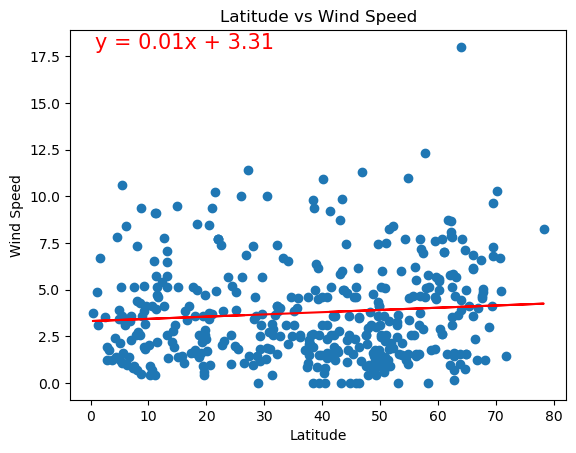

In [21]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Latitude','Wind Speed')

The r^2-value is : 0.023869160964191085


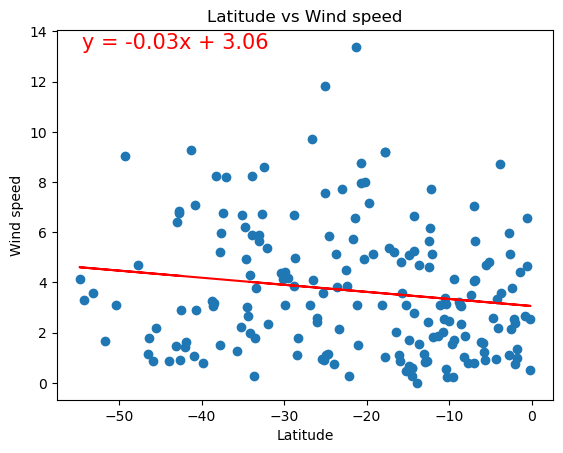

In [22]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Latitude','Wind speed')

**Discussion about the linear relationship:** The slope is negative which means there is opposite relation in between latitude and wind speed in southern hemisphere but in northern hemisphere its positive. For ever unit increase in the latitude there is 0.03 decrease in wind speed in southern hemisphere but there is 0.01 increase in wind speed in northern hemisphere.